# Data Selection Notes - Question 2, applying ONC criteria to other regions

In [These data notes](Data%20selection%20notes%20Q1%20dec9_2020.ipynb), I was able to demonstrate that it is possible to reproduce the ONC data selection criteria *exactly* when using the new "summary spreadsheets" which are computed with pandas (instead of the old ones, computed using ATpy). 

Switching to pandas was vital for performance, maintainability, and compatibility with Python 3, so it was a natural decision to make. Nonetheless, it was a painful transition because (a) the ATpy-based old code had a lot of subtle workarounds and design decisions that ended up being necessary from a science perspective, but (b) ATpy is no longer really usable in its current state, so it was not going to support continued research into data from other star-forming regions, and (c) pandas is a much more appropriate data-processing package for a long list of reasons, but it was unintuitive to learn how to use.

Fortunately, the transition is complete and I've verified that the analysis code using pandas is exactly equivalent (to my satisfaction) to the ATpy analysis code. Which means that everything going forward is *easy*.

(There is a little bit of irony in the fact that it took almost a year of refashioning the code to finally reproduce the old results, but, we've crossed over that bridge. **shrug emoji**)

## Question 2:


> When the "quality bins" criteria are applied to the other 4 regions, do we get sensible and consistent results? Or do any issues arise in the other datasets that require special cases?

Let's give this a shot. Basically, can we load up all five datasets and apply the old q0/q1/q2 selection criteria *exactly* and see what happens?

(A quick caveat. In the ONC, we included a very slight "location-based" quality criterion after seeing a bunch of instrumental artifacts show up along one edge of the observed field that were not caught by any other data quality criterion, so we had to trim out the edge of that field. I'm not doing that for any of the observations below, so the ONC's data won't match the 2015 paper exactly anymore.)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Let's re-implement the above for WSERV5, in my new reduction.

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
for wserv in wserv_ids[::-1]:
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
    if wserv==5:
        spreadsheet_path = os.path.join(
            spreadsheet_root, 
            "wserv5_v2012",
            f"WSERV{str(wserv)}_fdece_graded_clipped0.8_scrubbed0.1_dusted0.5_summary_spreadsheet.h5")
#         print(f"WSERV5: {spreadsheet_path}")

    ds = pd.read_hdf(spreadsheet_path, key='table')

    q0 = (
        (ds["count"]["N_J"] >= 50)
        | (ds["count"]["N_H"] >= 50)
        | (ds["count"]["N_K"] >= 50)
    )

    print("")
    print("Total detected sources:", len(ds))
    print("Total sources with at least 50 obs in one band:", len(ds[q0]))

    q1_old = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] <= 125)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["mean"]["JAPERMAG3"] < 17)
            & (ds["count"]["N_J_info"] == 0)
        )
        | (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] <= 125)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["mean"]["HAPERMAG3"] < 16)
            & (ds["count"]["N_H_info"] == 0)
        )
        | (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] <= 125)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["mean"]["KAPERMAG3"] < 16)
            & (ds["count"]["N_K_info"] == 0)
        )
    )     & (ds["median"]["PSTAR"] > 0.75)

    q1_location = np.degrees(ds['median']['RA']) > 0
    q1 = q1_old & q1_location

    print("Total Q=1 sources:", len(ds[q1]))

    q2_old = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] <= 125)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["mean"]["JAPERMAG3"] < 17)
            & (ds["count"]["N_J_info"] == 0)
        )
        & (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] <= 125)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["mean"]["HAPERMAG3"] < 16)
            & (ds["count"]["N_H_info"] == 0)
        )
        & (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] <= 125)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["mean"]["KAPERMAG3"] < 16)
            & (ds["count"]["N_K_info"] == 0)
        )
    ) & (ds["median"]["PSTAR"] > 0.75)

    q2 = q2_old & q1_location

    print("Total Q=2 sources:", len(ds[q2]))


   WSERV11: 


Total detected sources: 37947
Total sources with at least 50 obs in one band: 23588
Total Q=1 sources: 5826
Total Q=2 sources: 4110

   WSERV8: 


Total detected sources: 27769
Total sources with at least 50 obs in one band: 15646
Total Q=1 sources: 3639
Total Q=2 sources: 2597

   WSERV7: 


Total detected sources: 21885
Total sources with at least 50 obs in one band: 13563
Total Q=1 sources: 1800
Total Q=2 sources: 487

   WSERV5: 


Total detected sources: 40630
Total sources with at least 50 obs in one band: 14728
Total Q=1 sources: 3705
Total Q=2 sources: 2436

   WSERV1: 


Total detected sources: 227368
Total sources with at least 50 obs in one band: 123019
Total Q=1 sources: 19643
Total Q=2 sources: 11194



   WSERV11: 


Total detected sources: 37947
Total sources with at least 50 obs in one band: 23588
Total Q=1 sources: 5826
Total Q=2 sources: 4110

   WSERV8: 


Total detected sources: 27769
Total sources with at least 50 obs in one band: 15646
Total Q=1 sources: 3639
Total Q=2 sources: 2597

   WSERV7: 


Total detected sources: 21885
Total sources with at least 50 obs in one band: 13563
Total Q=1 sources: 1800
Total Q=2 sources: 487

   WSERV5: 


Total detected sources: 40630
Total sources with at least 50 obs in one band: 14728
Total Q=1 sources: 3705
Total Q=2 sources: 2436

   WSERV1: 


Total detected sources: 227368
Total sources with at least 50 obs in one band: 123019
Total Q=1 sources: 19643
Total Q=2 sources: 11194


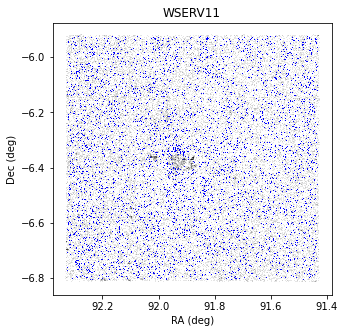

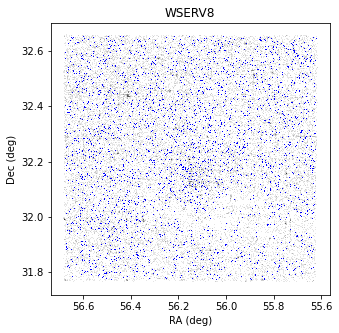

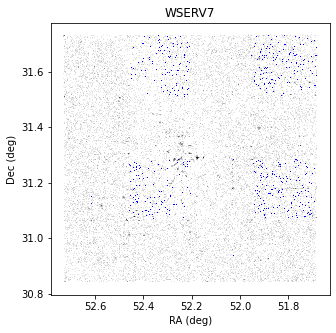

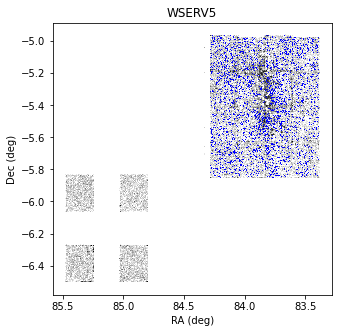

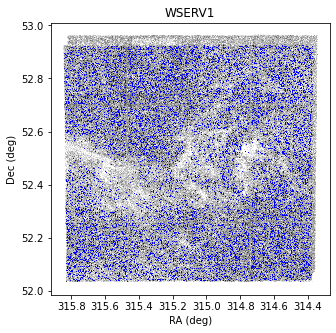

In [7]:
# Maps

# Let's re-implement the above for WSERV5, in my new reduction.

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
for wserv in wserv_ids[::-1]:
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
    if wserv==5:
        spreadsheet_path = os.path.join(
            spreadsheet_root, 
            "wserv5_v2012",
            f"WSERV{str(wserv)}_fdece_graded_clipped0.8_scrubbed0.1_dusted0.5_summary_spreadsheet.h5")
#         print(f"WSERV5: {spreadsheet_path}")

    ds = pd.read_hdf(spreadsheet_path, key='table')

    q0 = (
        (ds["count"]["N_J"] >= 50)
        | (ds["count"]["N_H"] >= 50)
        | (ds["count"]["N_K"] >= 50)
    )

    print("")
    print("Total detected sources:", len(ds))
    print("Total sources with at least 50 obs in one band:", len(ds[q0]))

    q1_old = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] <= 125)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["mean"]["JAPERMAG3"] < 17)
            & (ds["count"]["N_J_info"] == 0)
        )
        | (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] <= 125)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["mean"]["HAPERMAG3"] < 16)
            & (ds["count"]["N_H_info"] == 0)
        )
        | (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] <= 125)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["mean"]["KAPERMAG3"] < 16)
            & (ds["count"]["N_K_info"] == 0)
        )
    )     & (ds["median"]["PSTAR"] > 0.75)

    q1_location = np.degrees(ds['median']['RA']) > 0
    q1 = q1_old & q1_location

    print("Total Q=1 sources:", len(ds[q1]))

    q2_old = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] <= 125)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["mean"]["JAPERMAG3"] < 17)
            & (ds["count"]["N_J_info"] == 0)
        )
        & (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] <= 125)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["mean"]["HAPERMAG3"] < 16)
            & (ds["count"]["N_H_info"] == 0)
        )
        & (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] <= 125)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["mean"]["KAPERMAG3"] < 16)
            & (ds["count"]["N_K_info"] == 0)
        )
    ) & (ds["median"]["PSTAR"] > 0.75)

    q2 = q2_old & q1_location

    print("Total Q=2 sources:", len(ds[q2]))
    
    fig = plt.figure(figsize=(5,5))
    
    plt.plot(np.degrees(ds['median']['RA']), np.degrees(ds['median']['DEC']), 'k,', alpha=0.1)
    plt.plot(np.degrees(ds['median']['RA'][q2_old]), np.degrees(ds['median']['DEC'][q2_old]), 'b,')
    plt.gca().invert_xaxis()
    plt.title(f"WSERV{str(wserv)}")
    plt.xlabel("RA (deg)")
    plt.ylabel("Dec (deg)")

# What are we learning from the maps?

I see that WSERV7 is having difficulty measuring up to the other datasets - its proportion of Q1 and Q2 stars is far lower, and when looking at the maps, it's clear there's a spatial correlation. I think that the Q1/Q2 criteria will need to be revised for WSERV7.

Oh! It TOTALLY might be related to the fact that WSERV7 has **more observations** so capping out at 125 observations is counterproductive. We'll want to make some kind of plot of N_obs per dataset to better fine-tune the appropriate numbers to use!!


   WSERV11: 


Total detected sources: 37947
Total sources with at least 50 obs in one band: 23588
Total Q=1 sources: 5826
Total Q=2 sources: 4110


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in l


   WSERV8: 


Total detected sources: 27769
Total sources with at least 50 obs in one band: 15646
Total Q=1 sources: 3639
Total Q=2 sources: 2597


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in l


   WSERV7: 


Total detected sources: 21885
Total sources with at least 50 obs in one band: 13563
Total Q=1 sources: 1800
Total Q=2 sources: 487


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in l


   WSERV5: 


Total detected sources: 40630
Total sources with at least 50 obs in one band: 14728
Total Q=1 sources: 3705
Total Q=2 sources: 2436


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in l


   WSERV1: 


Total detected sources: 227368
Total sources with at least 50 obs in one band: 123019
Total Q=1 sources: 19643
Total Q=2 sources: 11194


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in l

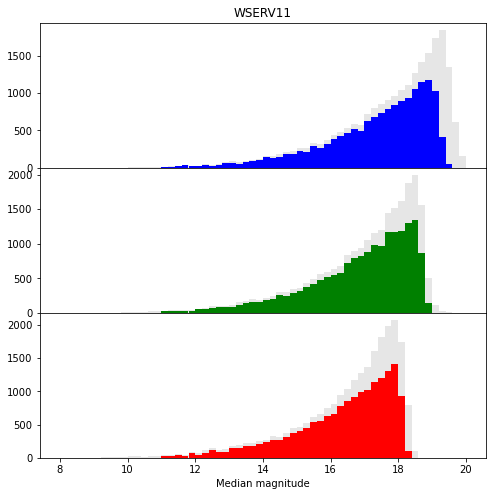

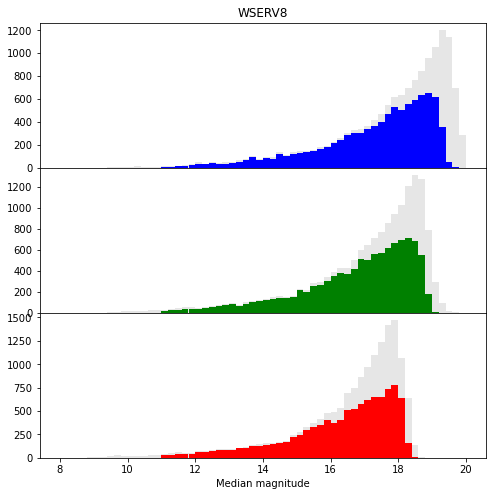

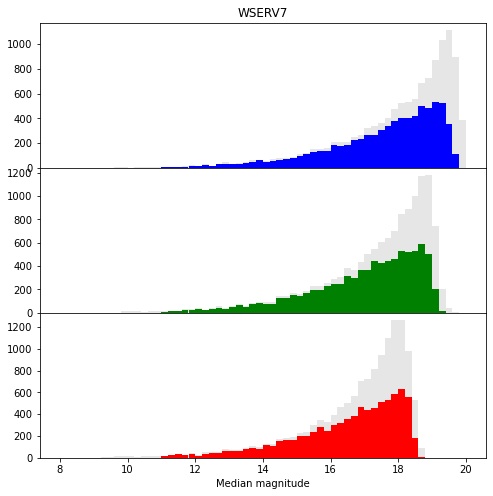

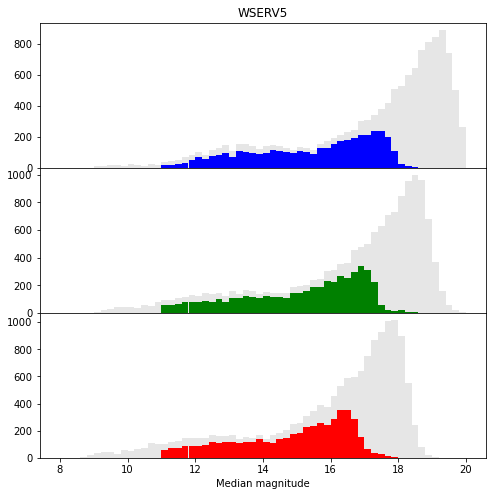

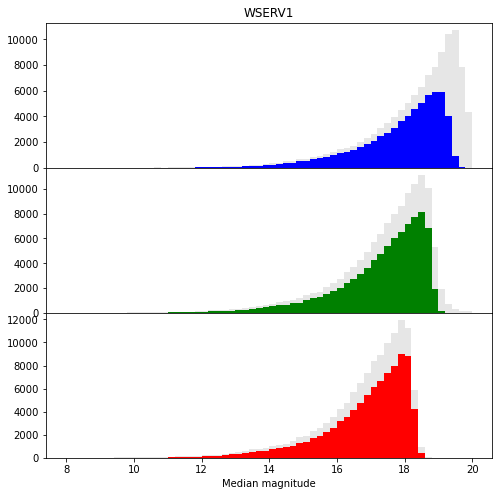

In [10]:
# Histograms
# Maps

# Let's re-implement the above for WSERV5, in my new reduction.

spreadsheet_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"
wserv_ids = [1, 5, 7, 8, 11]
for wserv in wserv_ids[::-1]:
    
    print(f"\n   WSERV{wserv}: \n")

    spreadsheet_path = os.path.join(
        spreadsheet_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )
    if wserv==5:
        spreadsheet_path = os.path.join(
            spreadsheet_root, 
            "wserv5_v2012",
            f"WSERV{str(wserv)}_fdece_graded_clipped0.8_scrubbed0.1_dusted0.5_summary_spreadsheet.h5")
#         print(f"WSERV5: {spreadsheet_path}")

    ds = pd.read_hdf(spreadsheet_path, key='table')

    q0 = (
        (ds["count"]["N_J"] >= 50)
        | (ds["count"]["N_H"] >= 50)
        | (ds["count"]["N_K"] >= 50)
    )

    print("")
    print("Total detected sources:", len(ds))
    print("Total sources with at least 50 obs in one band:", len(ds[q0]))

    q1_old = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] <= 125)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["mean"]["JAPERMAG3"] < 17)
            & (ds["count"]["N_J_info"] == 0)
        )
        | (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] <= 125)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["mean"]["HAPERMAG3"] < 16)
            & (ds["count"]["N_H_info"] == 0)
        )
        | (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] <= 125)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["mean"]["KAPERMAG3"] < 16)
            & (ds["count"]["N_K_info"] == 0)
        )
    )     & (ds["median"]["PSTAR"] > 0.75)

    q1_location = np.degrees(ds['median']['RA']) > 0
    q1 = q1_old & q1_location

    print("Total Q=1 sources:", len(ds[q1]))

    q2_old = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] <= 125)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["mean"]["JAPERMAG3"] < 17)
            & (ds["count"]["N_J_info"] == 0)
        )
        & (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] <= 125)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["mean"]["HAPERMAG3"] < 16)
            & (ds["count"]["N_H_info"] == 0)
        )
        & (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] <= 125)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["mean"]["KAPERMAG3"] < 16)
            & (ds["count"]["N_K_info"] == 0)
        )
    ) & (ds["median"]["PSTAR"] > 0.75)

    q2 = q2_old & q1_location
    q1_j = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] < 150)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
        )
        & (ds["median"]["PSTAR"] > 0.75)
    )    
    q1_h = (
        (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] < 150)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
        )
        & (ds["median"]["PSTAR"] > 0.75)
    )    
    q1_k = (
        (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] < 150)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
        )
        & (ds["median"]["PSTAR"] > 0.75)
    )    
    print("Total Q=2 sources:", len(ds[q2]))
    
    fig, axes = plt.subplots(3, sharex=True, figsize=(8,8))
    
    axes[0].hist(ds['median']['JAPERMAG3'][q0], range=[8,20], bins=(20-8)*5, color='0.9', histtype='stepfilled')
    axes[1].hist(ds['median']['HAPERMAG3'][q0], range=[8,20], bins=(20-8)*5, color='0.9', histtype='stepfilled')
    axes[2].hist(ds['median']['KAPERMAG3'][q0], range=[8,20], bins=(20-8)*5, color='0.9', histtype='stepfilled')

    axes[0].hist(ds['median']['JAPERMAG3'][q1_j], range=[8,20], bins=(20-8)*5, color='b')
    axes[1].hist(ds['median']['HAPERMAG3'][q1_h], range=[8,20], bins=(20-8)*5, color='g')
    axes[2].hist(ds['median']['KAPERMAG3'][q1_k], range=[8,20], bins=(20-8)*5, color='r')
    
    axes[2].set_xlabel("Median magnitude")
    axes[0].set_title(f"WSERV{wserv}")
    plt.subplots_adjust(hspace=0)